In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [ ]:
data = pd.read_csv("my_paypal_creditcard.csv")
data.head(10)
data.dropna(inplace=True)
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251924,155567.0,1.937721,-0.145271,-0.662504,1.199185,0.310307,0.849005,-0.349547,0.214352,0.791645,...,-0.502829,-1.163365,0.375602,-0.026208,-0.224176,-1.117270,0.054985,-0.038071,8.3,0
273843,165722.0,-0.412847,-0.314298,1.216886,-2.803262,-0.242324,-0.250549,-0.040164,-0.059754,-2.344033,...,-0.189428,-0.213688,-0.374452,0.453294,0.698145,-0.054778,0.023259,0.053284,15.0,0
266942,162546.0,1.780010,-0.527189,-2.058949,0.514694,0.109410,-1.235151,0.656278,-0.387881,0.369730,...,0.647926,1.779101,-0.434913,0.172700,0.744943,0.295426,-0.085410,-0.066988,145.4,0
49212,43958.0,1.057178,-0.204919,1.117420,1.257456,-0.946227,0.002761,-0.678328,0.275827,0.765692,...,0.131475,0.266825,0.013853,0.021622,0.184898,-0.329247,0.058353,0.039712,45.0,0
175647,122428.0,2.204567,-0.787619,-1.600889,-0.962140,-0.308107,-0.800321,-0.366506,-0.254481,-0.640027,...,0.588411,1.811640,-0.211231,-0.295314,0.483322,0.297525,-0.045520,-0.089353,12.0,0


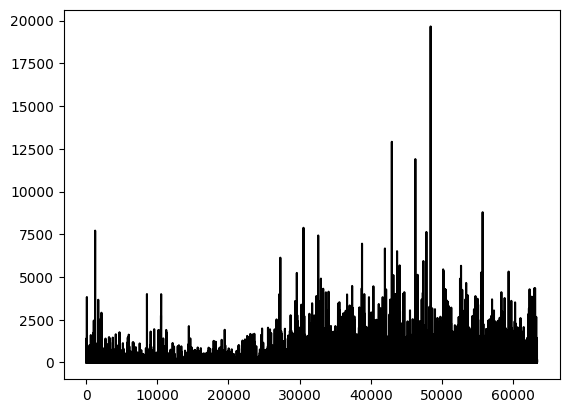

In [ ]:
x = np.array(data["Time"])
y = np.array(data["Amount"])

fig, ax = plt.subplots()
ax.plot(x, y,color = 'black')

data["Time"].plot(kind="box", figsize=(12,6))

data["Time"].plot(kind="hist", figsize=(12,6))

<Axes: >

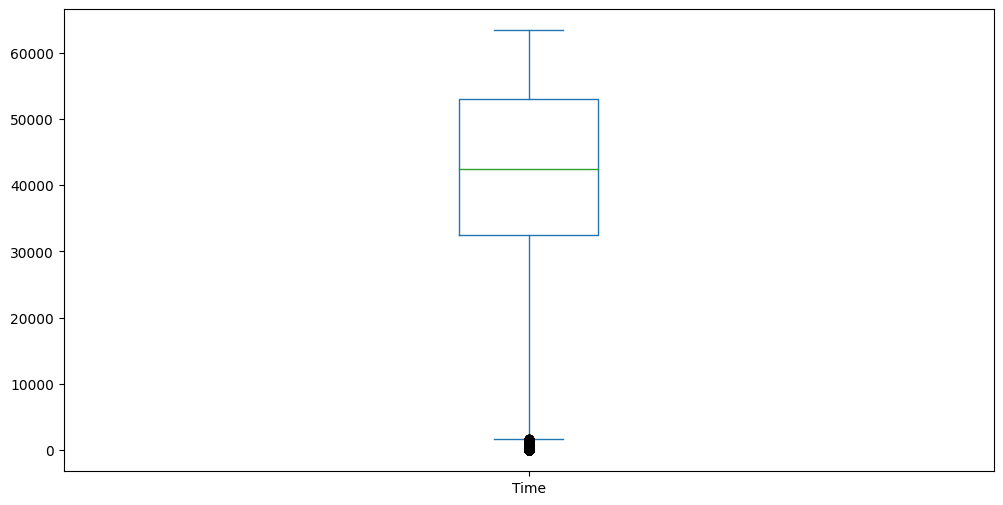

In [ ]:
data["Time"].plot(kind="box", figsize=(12,6))

<Axes: ylabel='Frequency'>

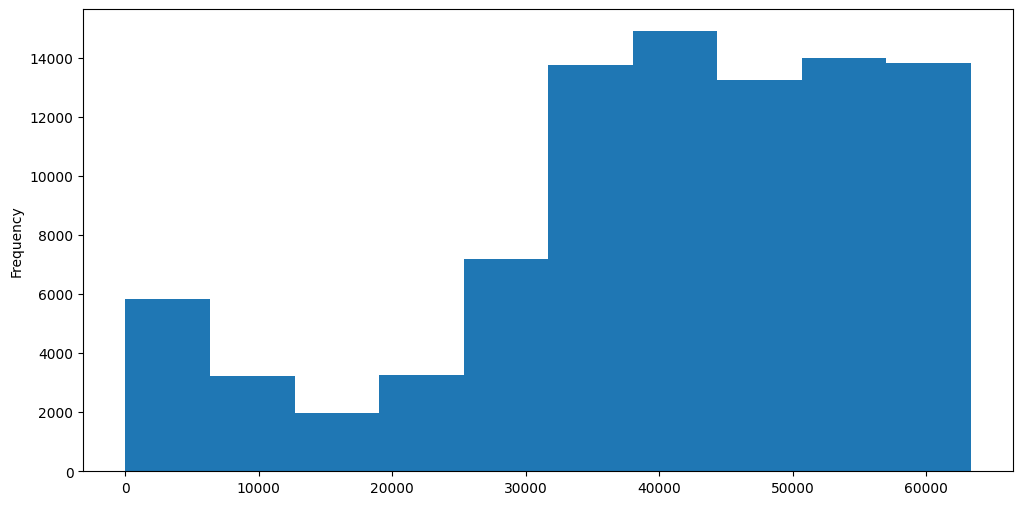

In [ ]:
data["Time"].plot(kind="hist", figsize=(12,6))

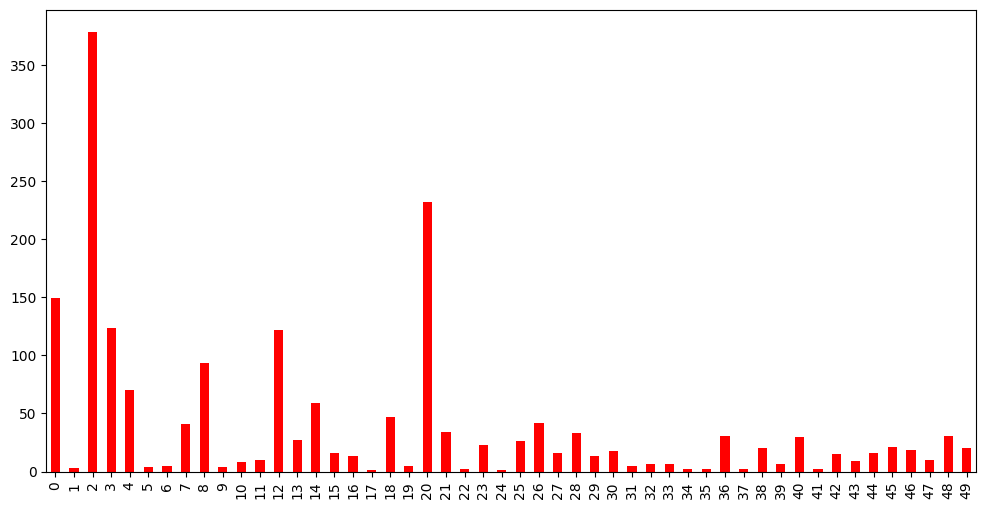

In [ ]:
ax = data["Amount"][:50].plot(kind="bar", figsize=(12,6), color="r")


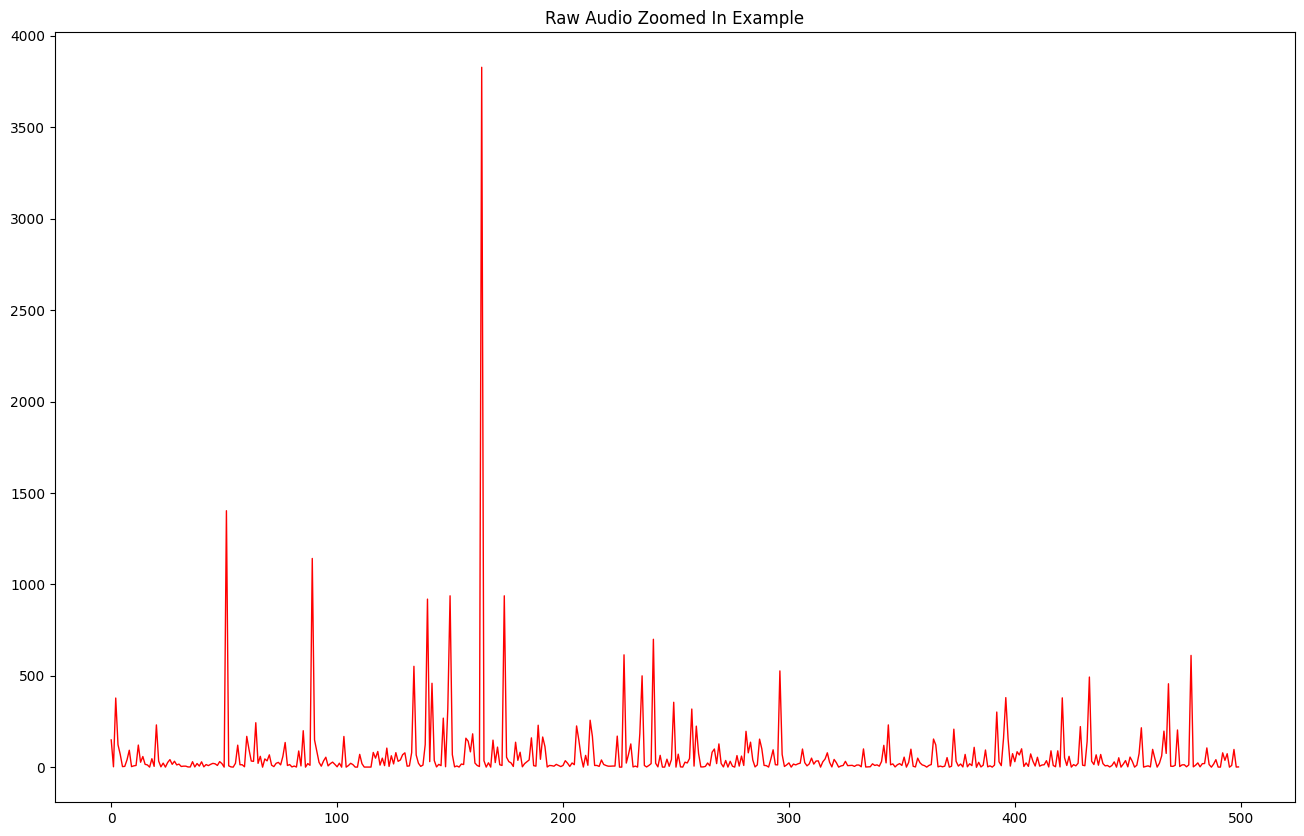

In [ ]:
data["Amount"][:500].plot(figsize=(16, 10),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color='red')
plt.show()

In [ ]:
def Analyze_All_Vs(data: pd.DataFrame, X_value: str, figsize: tuple):
    x = np.array(data[X_value])

    fig, ax = plt.subplots(7, 4, sharex=True, sharey=True, figsize=figsize)
    for i, j in enumerate(data.columns[1:-2]):

      ax[i//4][i % 4].scatter(x, data[j],
                              c = "pink",
                              linewidths = 1,
                              marker ="s",
                              edgecolor ="green",
                              s = 20)
      ax[i//4][i % 4].set_title(f"{j} and {X_value}")
    plt.show()

Analyze_All_Vs(data, 'Amount', (20, 30))

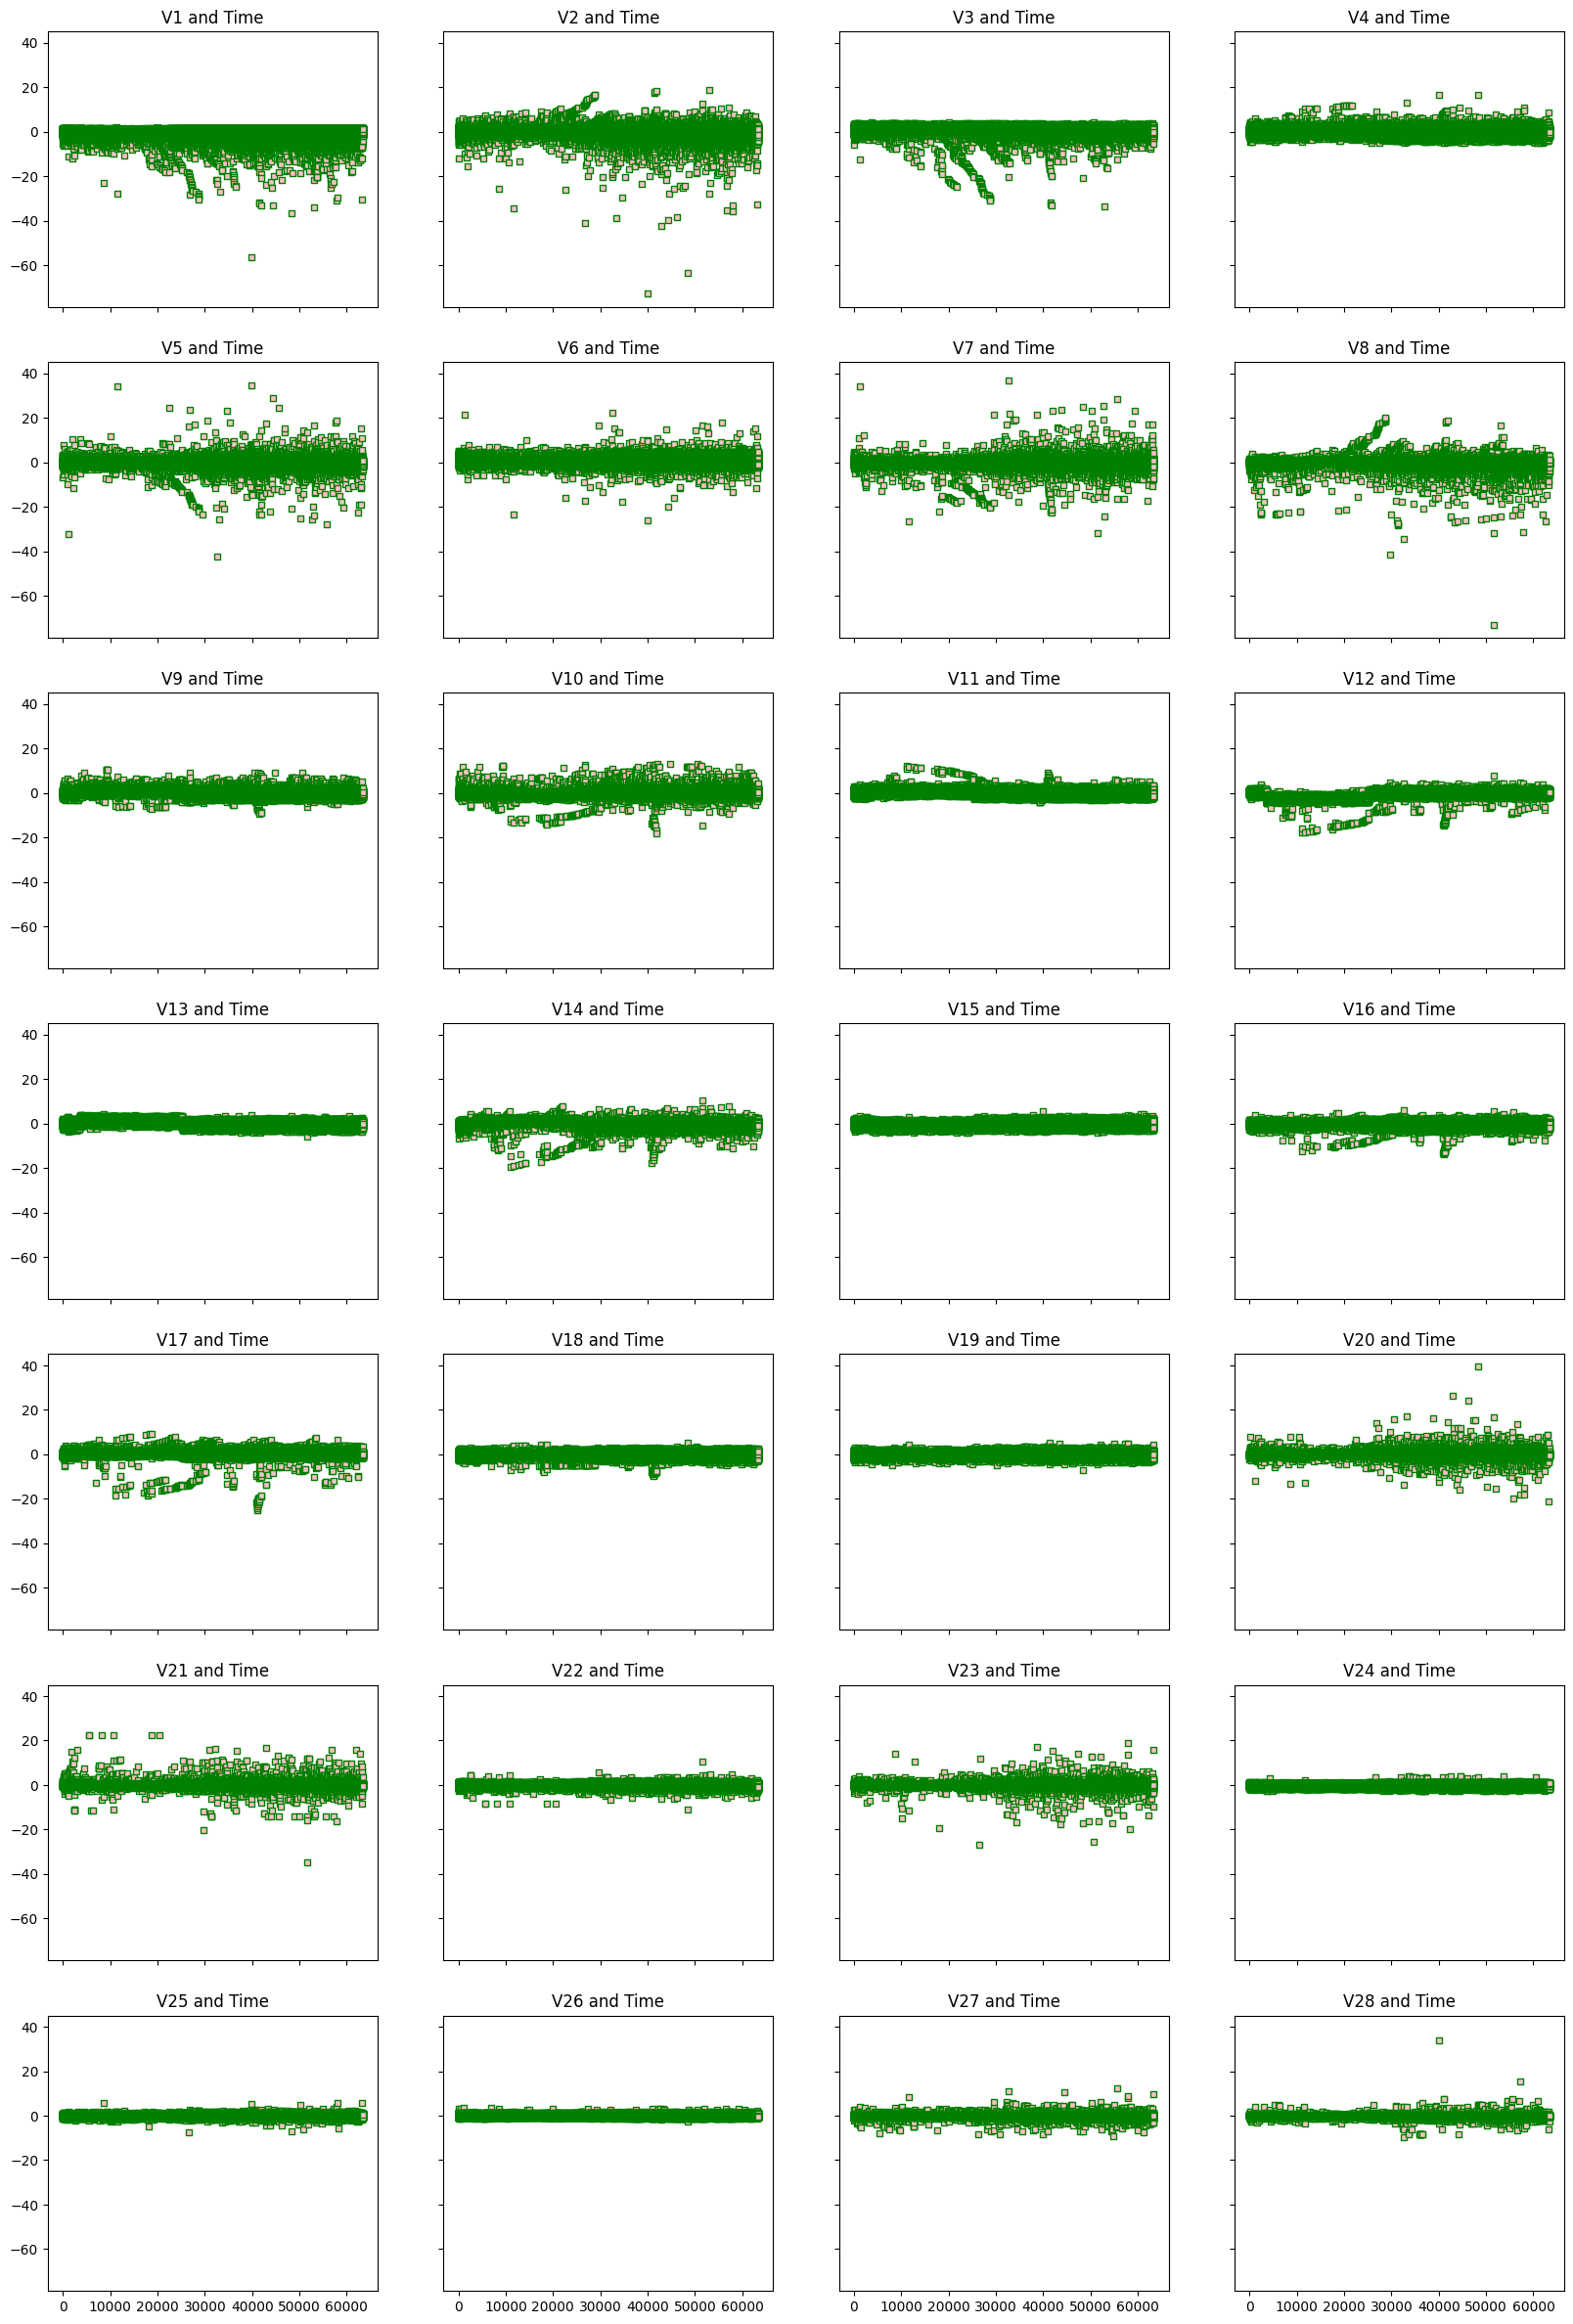

In [ ]:
Analyze_All_Vs(data, 'Time', (20, 30))

<Axes: >

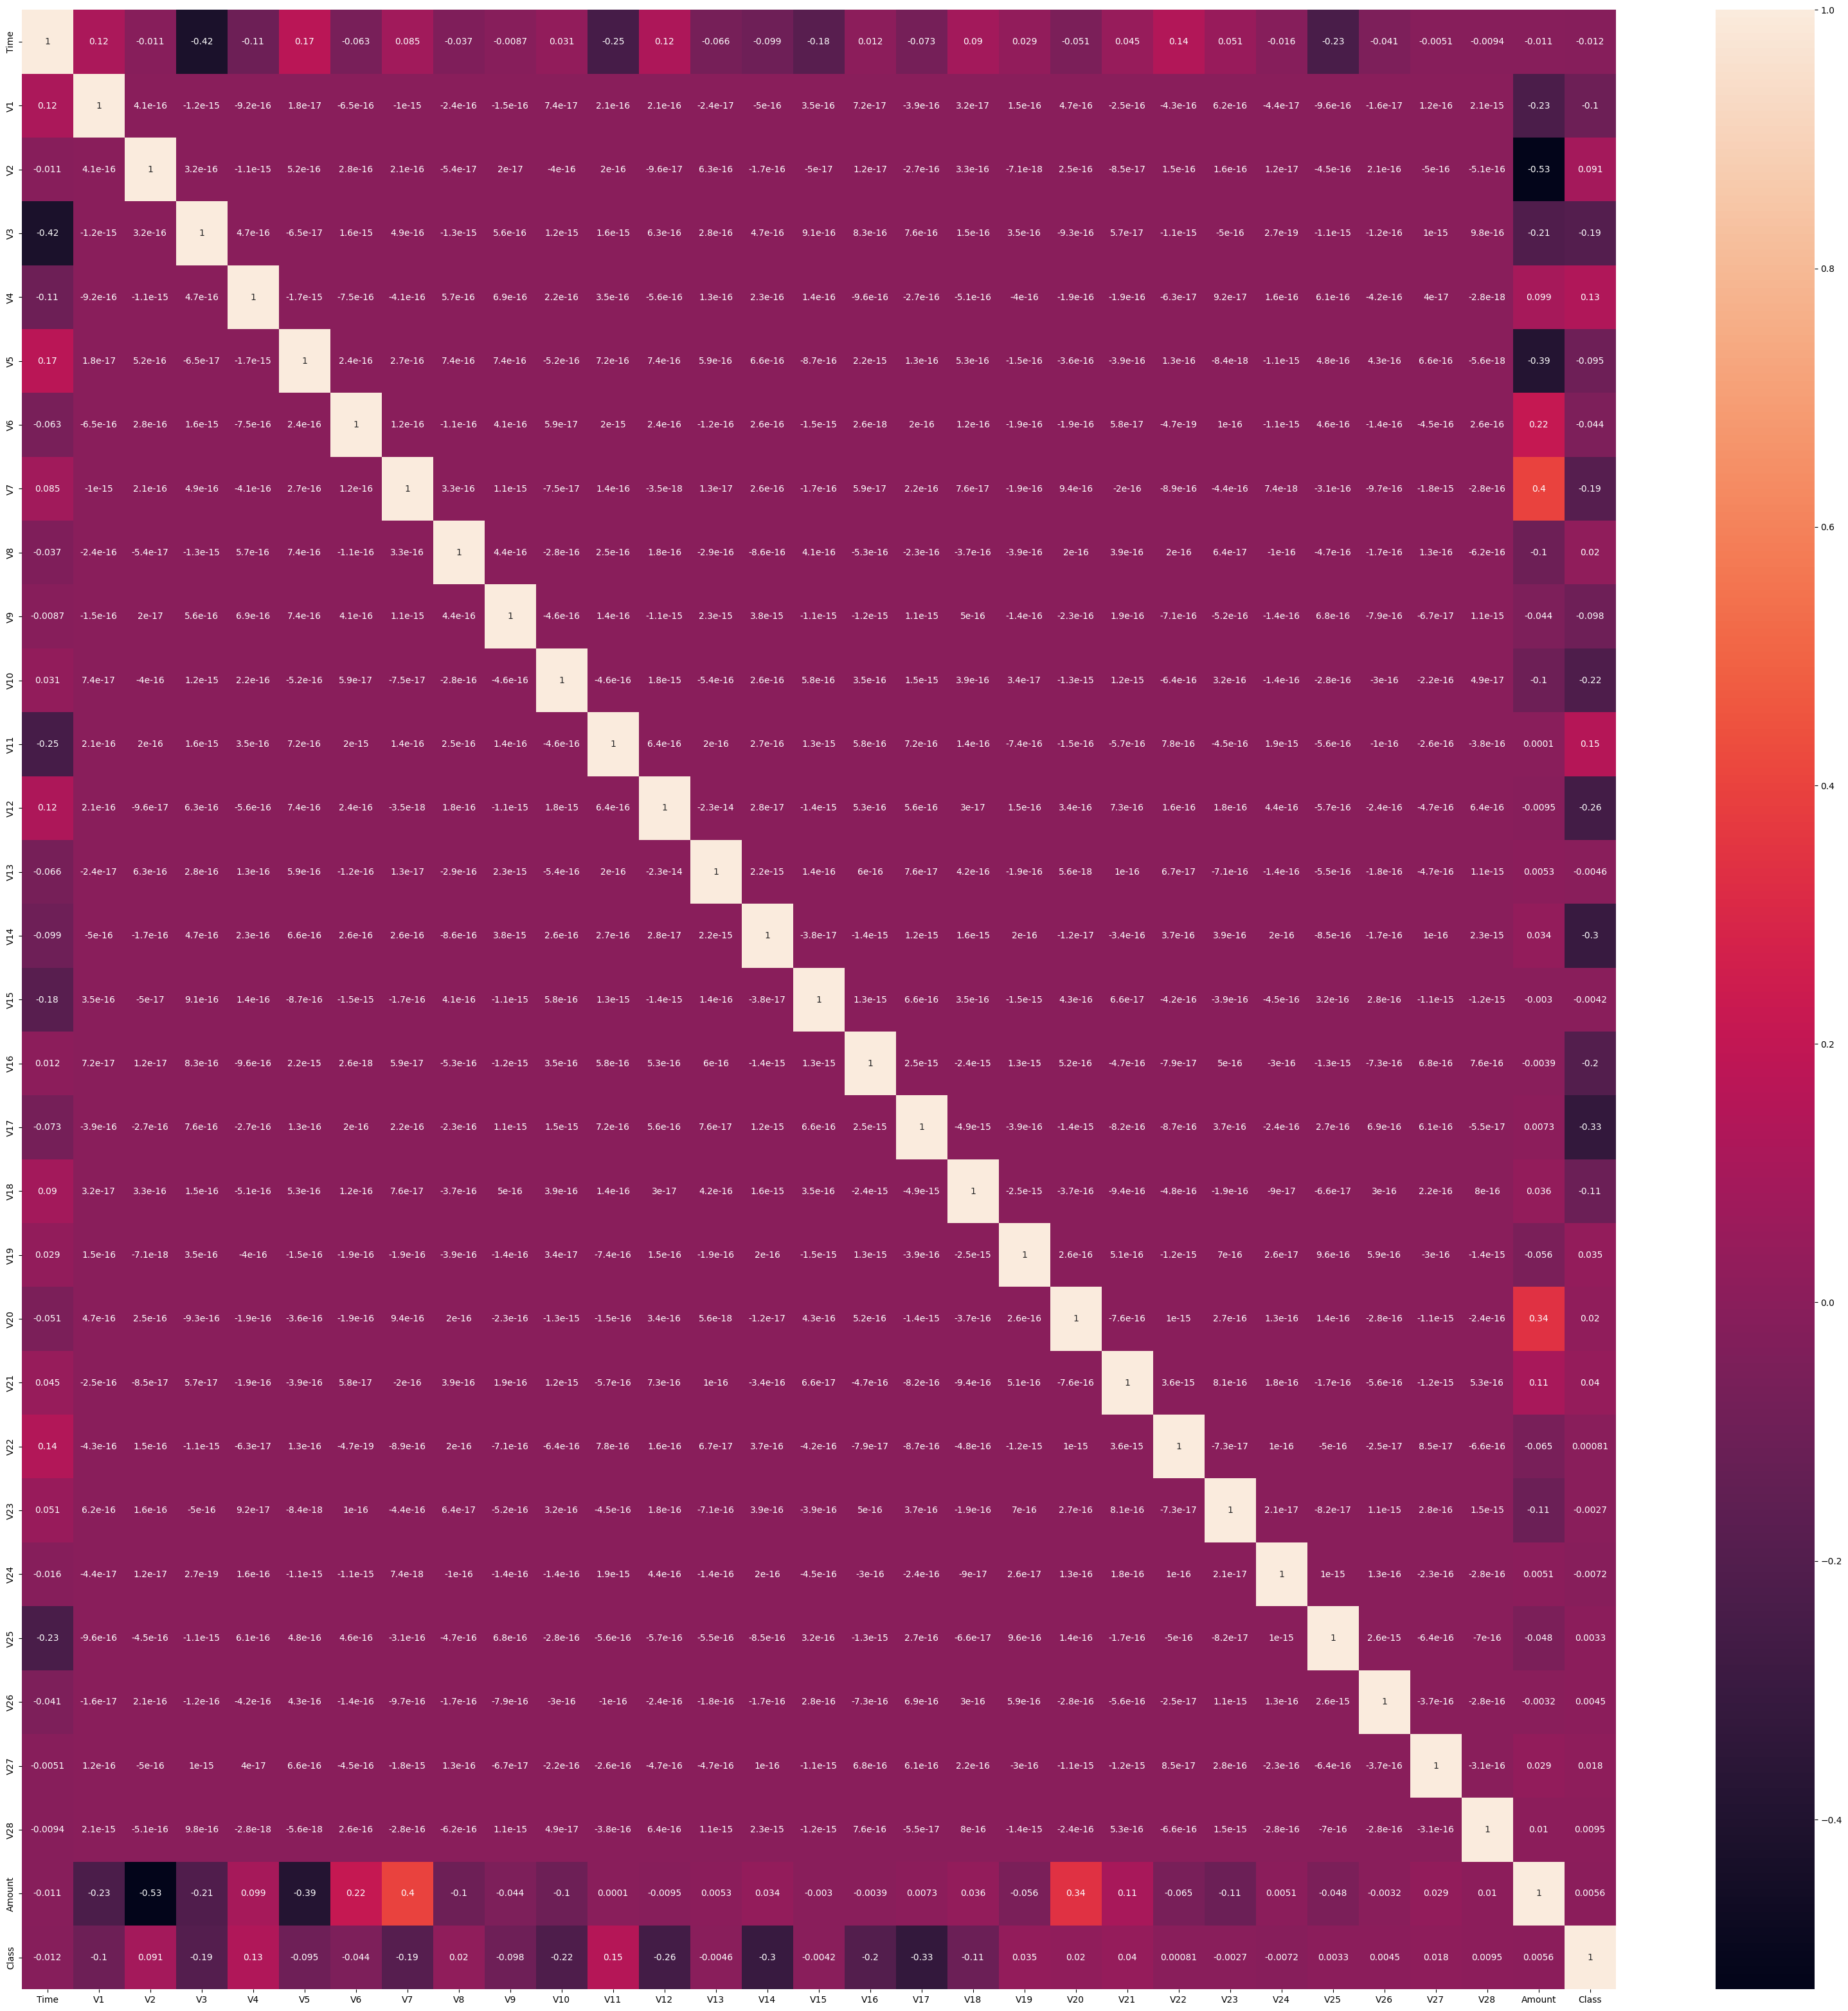

In [ ]:
import seaborn as sns
corr = data.corr()
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr, annot=True, ax=ax)

<h1>machina learning

In [ ]:
# !pip install -U imbalanced-learn

In [51]:
class ML:
    def __init__(self, *, data=None, train_test_split=False):
        self.data = data
        self.tts = train_test_split
    def _data_seperation(self, balance_data=False, test_size=0.33):
        X = self.data.drop("Class",axis=1)
        y = self.data["Class"]
        if not balance_data :
            return train_test_split(X,y, test_size=test_size)
        else:
            sm = SMOTE()
            X_balanced, y_balanced = sm.fit_resample(X, y)
            X1, X2, y1, y2 = train_test_split(X_balanced, y_balanced, test_size=test_size)
            return X1, X2, y1, y2
    def RandomForestML(self, max_depth=3, n_estimators=100, criterion='gini'):
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion, n_jobs=-1)

        X_train, X_test, y_train, y_test = self._data_seperation(test_size=0.2)

        clf.fit(X_train, y_train)

        pred = clf.predict(X_test)

        acc, mse = accuracy_score(y_test, pred), mean_squared_error(y_test, pred)

        return acc, mse


    def RandomForestBoosing_Hparams(self, params: dict):

        X_train, X_test, y_train, y_test = self._data_seperation(test_size=0.2)

        clf = RandomForestClassifier(n_jobs=4)

        rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=1, # try 10 models total
                            cv=4, # 5-fold cross-validation
                            verbose=2) # print out results
        rs_clf.fit(X_train, y_train)

        best_params = rs_clf.best_params_

        pred = rs_clf.predict(X_test)

        acc, mse = accuracy_score(y_test, pred), mean_squared_error(y_test, pred)
        return acc, mse, best_params
grid = {"n_estimators": [10, 100, 200],
        "max_depth": [5, 10],
        "min_samples_split": [2, 3, 4],
        "min_samples_leaf": [1, 2, 4]}
ML_class = ML(data=data, train_test_split=True)
acc, mse, best_res = ML_class.RandomForestBoosing_Hparams(grid)
print(f'Accuracy: {acc}\nMSE: {mse}')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.2min
Accuracy: 0.999403110845827
MSE: 0.0005968891541729574


In [ ]:
ML_class = ML(data=data, train_test_split=True)
acc, mse = ML_class.RandomForestBoosing_Hparams(grid)
print(f'Accuracy: {acc}\nMSE: {mse}')

Accuracy: 0.9994382219725431
MSE: 0.0005617780274569011


In [ ]:
ML_class.RandomForestBoosing_Hparams(grid)

In [52]:
X = data.drop("Class",axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [53]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [54]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)

7121/7121 [==============================] - 59s 8ms/step - loss: 5.5412 - accuracy: 0.9956 - val_loss: 0.0703 - val_accuracy: 0.9983


In [55]:
_, accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("Accuracy:",accuracy*100)

446/446 [==============================] - 3s 5ms/step - loss: 0.0703 - accuracy: 0.9983
Accuracy: 99.83497858047485
